# Project Report  :  
###  Data Augmentation for Recognition of Handwritten Words and Lines using a CNN-LSTM Network
<b> Literature  https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=8270041</b><br>
<b>Git hub project url https://github.com/agarwal29796/handwritten-text-recognition.git</b> 

#### Team Name : vision 
Siddhesh Sawant  2018201031<br>
Archit Kumar 2018201051<br>
Aman Agarwal 2018201006

<b> Abstract </b><br>
Given paper introduce two data augmentation and normalization techniques, which, used with a CNN-LSTM, significantly reduce Word Error Rate (WER) and Character Error Rate
(CER) beyond best-reported results on handwriting recognition
tasks.<br>
<b>1. </b> We apply a novel <b>profile normalization</b> technique
to both word and line images. <br><b>2. </b> We <b>augment</b> existing text
images using random perturbations on a regular grid. We
apply our normalization and augmentation to both training
and test images. Our approach achieves low WER and CER
over hundreds of authors, multiple languages and a variety of
collections written centuries apart. 

### 1. Profile Normalization 

Images are normalized to compensate for variations in the
size of the handwriting. We normalize word images using the
difference d between the upper and lower baseline provided
in the <b>IAM Database</b> and the standard deviation σ of
their horizontal profiles. We define ratio r as : <br>

$$ r = \dfrac{\bar{d}}{\bar{\sigma}} = \dfrac{1}{|A|}\sum_{i=1}^{|A|} \dfrac{\bar{d_i}}{\bar{\sigma_i}}  $$

where $\bar{d_i}$ is the average baseline difference for author i, $ σ̄_i $ is
the average standard deviation of the horizontal profile, and A
is the set of authors. r ≈ 1.75 for the IAM Database.
We normalize all images by a scale factor $ s = \dfrac {16}{\bar{\sigma_i}*r}$ since  $\bar{d_i}$ ≈ 16 pixels for most of the authors. 

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
%matplotlib inline

('shape of Image', (73, 382))


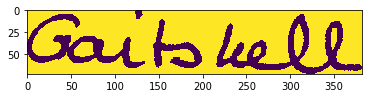

In [8]:
img =  cv2.imread('imgs/6.png',  0)  # Reading Gray Scale Image
img1  = np.where(img < 150 , 0, 1) # Converting into binary image by thresholding
print("shape of Image" , img1.shape)
plt.imshow(img1)
plt.show()

#### Creating histogram for horizontal profile 

In [9]:
h ,w = img1.shape
hist_arr = w - np.sum(img1, axis = 1)
std = hist_arr.std()
print("shape  of histogram " , hist_arr.shape)
print(h, w , std)

('shape  of histogram ', (73,))
(73, 382, 54.411365860884835)


#### Horizontal Profile of Image 

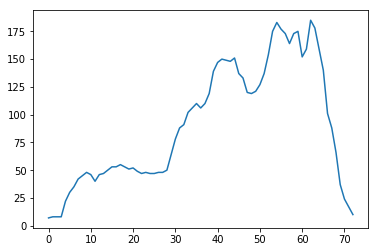

In [11]:
x = range(73)
plt.plot(x, hist_arr)
plt.show()

In [12]:
s = 16.0/(1.75*std) # Scale Factor 

#### Finding average std 

In [18]:
def cal(addr):
    img =  cv2.imread(addr,  0)
    img1  = np.where(img < 150 , 0, 1)
    h ,w = img1.shape
    hist_arr = w - np.sum(img1, axis = 1)
    std = hist_arr.std()
    return  std
    

In [19]:
avg = 0
for i in range(1,10):
    std = cal("imgs/"+ str(i)+".png")
    avg += std
avg = float(avg)/9
print(avg)

30.6837531155


###  Normalizing Original Images

In [20]:
def play(addr , std):
    img =  cv2.imread(addr,  0)
    h ,w = img.shape
    s = 16.0/(1.75*std)
    dim = (int(w*s) , int(h*s))
    print("original image shape : ")
    print(w,h)
    print("Normalized image shape : ")
    print(dim)
    new_img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    (thresh, im_bw) = cv2.threshold(new_img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    print("original Image : ")
    plt.imshow(img)
    plt.show()
    print("Image after normalizing and thresholding : ")
    plt.imshow(im_bw)
    plt.show()

original image shape : 
(27, 51)
Normalized image shape : 
(8, 15)
original Image : 


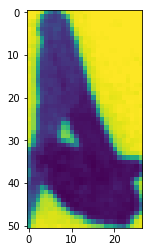

Image after normalizing and thresholding : 


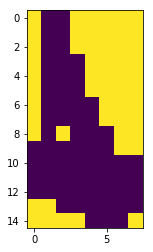

original image shape : 
(213, 48)
Normalized image shape : 
(63, 14)
original Image : 


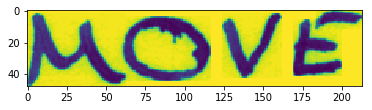

Image after normalizing and thresholding : 


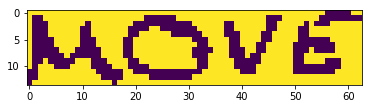

original image shape : 
(70, 50)
Normalized image shape : 
(20, 14)
original Image : 


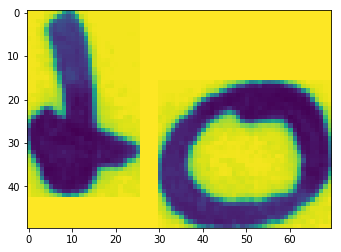

Image after normalizing and thresholding : 


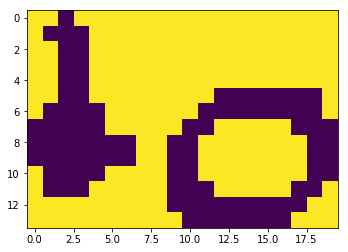

original image shape : 
(166, 78)
Normalized image shape : 
(49, 23)
original Image : 


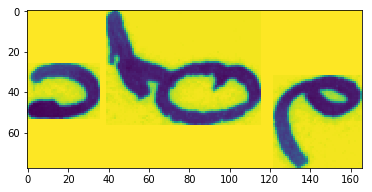

Image after normalizing and thresholding : 


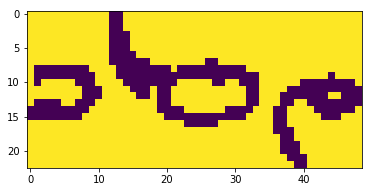

original image shape : 
(126, 61)
Normalized image shape : 
(37, 18)
original Image : 


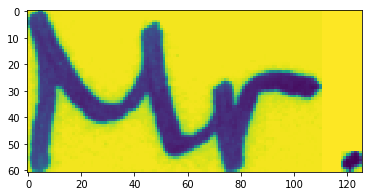

Image after normalizing and thresholding : 


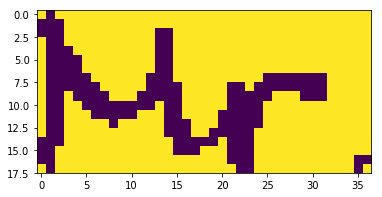

original image shape : 
(382, 73)
Normalized image shape : 
(113, 21)
original Image : 


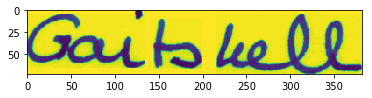

Image after normalizing and thresholding : 


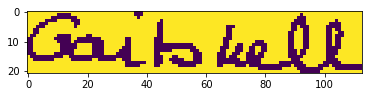

original image shape : 
(173, 72)
Normalized image shape : 
(51, 21)
original Image : 


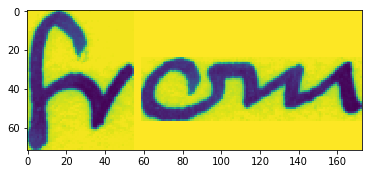

Image after normalizing and thresholding : 


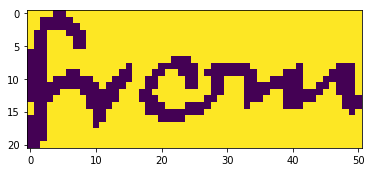

original image shape : 
(441, 100)
Normalized image shape : 
(131, 29)
original Image : 


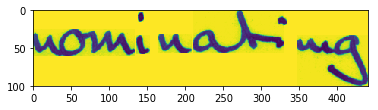

Image after normalizing and thresholding : 


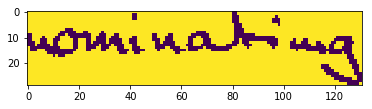

In [21]:
for i in range(1,9):
    play("imgs/" + str(i) +".png" ,  avg)

### 2. Novel Grid-Based Distortion Augmentation

In [22]:
def transform(images,alpha, sigma):
    image_shape = images[0].shape
        # Make random fields
    rng=np.random.RandomState(42)
  
    dx = rng.uniform(-1, 1, image_shape) * alpha
    dy = rng.uniform(-1, 1, image_shape) * alpha
        # Smooth dx and dy
    sdx = gaussian_filter(dx, sigma=sigma, mode='constant' , cval =  0)
    sdy = gaussian_filter(dy, sigma=sigma, mode='constant',  cval =  0)
        # Make meshgrid
    x, y = np.meshgrid(np.arange(image_shape[1]), np.arange(image_shape[0]))
        # Distort meshgrid indices
    distorted_indices = (y + sdy).reshape(-1, 1), (x + sdx).reshape(-1, 1)

        # Map cooordinates from image to distorted index set
    transformed_images = [map_coordinates(image, distorted_indices, mode='mirror',cval  = 0 ,
                                              order= 1).reshape(image_shape) for image in images]
    return transformed_images

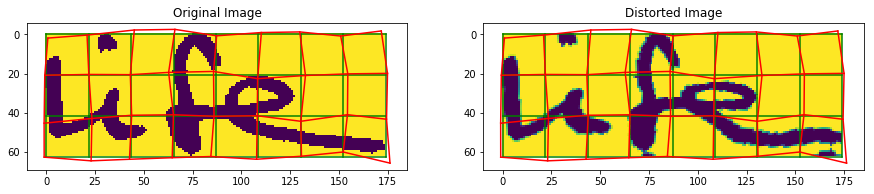

In [23]:
img = cv2.imread("imgs/life.png" , 0)
(thresh, img1) = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

h ,w  = img1.shape

def plot_grid(ax, gridx,gridy, **kwargs):
    for i in range(gridx.shape[0]):
        ax.plot(gridx[i,:], gridy[i,:], **kwargs)
    for i in range(gridx.shape[1]):
        ax.plot(gridx[:,i], gridy[:,i], **kwargs)

scaled_std = 1.7*h/80

def transform_c(grid_x , grid_y):
    gridx = grid_x.copy()
    gridy = grid_y.copy()
    for i  in range(gridx.shape[0]):
        for j in range(gridx.shape[1]):
            gridx[i,j] = scaled_std*np.random.randn() + gridx[i,j]
            gridy[i,j] = scaled_std*np.random.randn() + gridy[i,j]
    return gridx , gridy
    
    
    
fig, ax = plt.subplots(1,2,  figsize=(15,15))

grid_size = (h*26)/80

ax[0].imshow(img1)    
grid_x,grid_y = np.meshgrid(np.linspace(0,w,w/grid_size + 1), np.linspace(0 , h,h/grid_size + 1))
plot_grid(ax[0],grid_x,grid_y, color="green")

distx, disty = transform_c(grid_x,grid_y)
plot_grid(ax[0],distx, disty, color="red")

new_img = transform([img1] , 150 , 10)[0]

ax[0].title.set_text('Original Image')
ax[1].title.set_text('Distorted Image')

# plt.imshow(new_img)
ax[1].imshow(new_img)

plot_grid(ax[1],grid_x,grid_y, color="green")
plot_grid(ax[1],distx, disty, color="red")


plt.show()

### 3. Other augmentation techniques used in project 
As  mentioned in the following paper : <br>
<a> http://cvit.iiit.ac.in/images/ConferencePapers/2018/improving-cnn-rnn.pdf </a>

### Augmentation Method 2  : AFFINE Distortion  : 
Under affine transformation we apply <b>translation, scaling, rotation, and shearing.</b>

Here we restrict rotation to a random amount between (+/−)5 degrees,<br><br>
while shearing is restricted to (+/−)0.5 degrees along the horizontal direction which mimics the skew and cursiveness present in natural handwriting.<br><br>
We perform translation in terms of padding on all four sides, of upto 20 pixels in any direction, to simulate incorrect segmentation of words.


### < i > Scaling : 

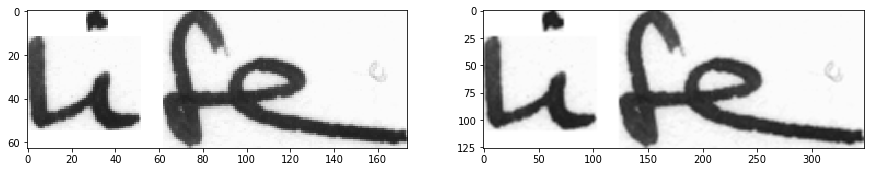

In [24]:
img = cv2.imread('imgs/life.png')
height, width = img.shape[:2]
res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)
fig ,  ax = plt.subplots(1,2,figsize = (15,15))
ax[0].imshow(img)
ax[1].imshow(res)

### < ii > Translation : 
A translation moves an object to a different position on the screen. You can translate a point in 2D by adding translation coordinate $(t_x, t_y)$ to the original coordinate (X, Y) to get the new coordinate (X’, Y’).
$$ M = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y  \end{bmatrix} $$

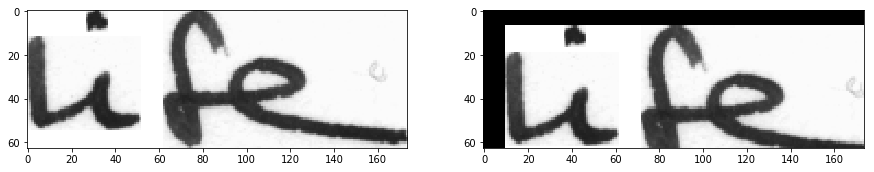

In [25]:
img = cv2.imread('imgs/life.png')
rows,cols,_ = img.shape
M = np.float32([[1,0,10],[0,1,7]])
dst = cv2.warpAffine(img,M,(cols,rows))
fig ,  ax = plt.subplots(1,2,figsize = (15,15))
ax[0].imshow(img)
ax[1].imshow(dst)

### < iii > Rotation : 
OpenCV provides scaled rotation with adjustable center of rotation so that you can rotate at any location you prefer. Modified transformation matrix is given by

\begin{bmatrix} \alpha &  \beta & (1- \alpha )  \cdot center.x -  \beta \cdot center.y \\ - \beta &  \alpha &  \beta \cdot center.x + (1- \alpha )  \cdot center.y \end{bmatrix}

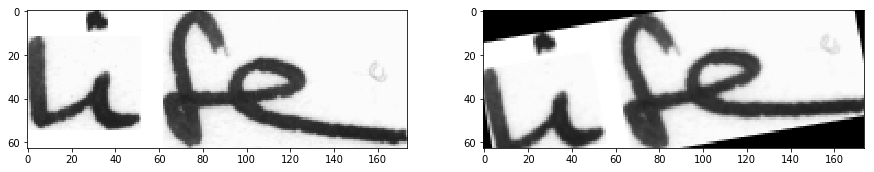

In [26]:
img = cv2.imread('imgs/life.png')
M = cv2.getRotationMatrix2D((cols/2,rows/2),10,1)
dst = cv2.warpAffine(img,M,(cols,rows))
fig ,  ax = plt.subplots(1,2,figsize = (15,15))
ax[0].imshow(img)
ax[1].imshow(dst)

### < iv > Shearing 
A transformation that slants the shape of an object is called the shear transformation. There are two shear transformations X-Shear and Y-Shear. One shifts X coordinates values and other shifts Y coordinate values. However; in both the cases only one coordinate changes its coordinates and other preserves its values. Shearing is also termed as Skewing.



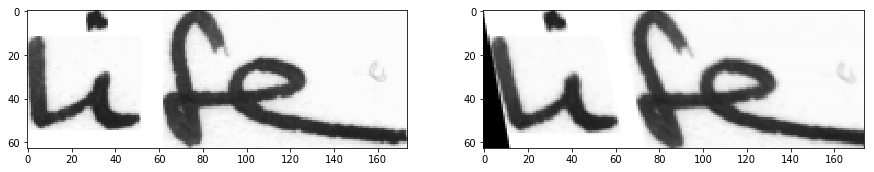

In [27]:
from skimage import io
from skimage import transform as tf

image = cv2.imread("imgs/life.png")
afine_tf = tf.AffineTransform(shear= 0.2)
modified = tf.warp(image, inverse_map=afine_tf)

fig ,  ax = plt.subplots(1,2,figsize = (15,15))
ax[0].imshow(image)
ax[1].imshow(modified)

### Combined Transform :  

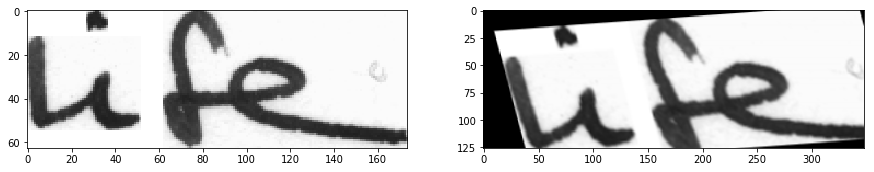

In [35]:
img1 = cv2.imread('imgs/life.png')
img = img1.copy()
img = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)

rows,cols,_ = img.shape
M = np.float32([[1,0,10],[0,1,7]])
img = cv2.warpAffine(img,M,(cols,rows))

rows,cols,_ = img.shape
M = cv2.getRotationMatrix2D((cols/2,rows/2),4,1)
img = cv2.warpAffine(img,M,(cols,rows))

afine_tf = tf.AffineTransform(shear= 0.2)
img = tf.warp(img, inverse_map=afine_tf)

fig ,  ax = plt.subplots(1,2,figsize = (15,15))
ax[0].imshow(img1)
ax[1].imshow(img)

## Augmentation Method 3 : Elastic  Distortion : 
Human handwriting has a high degree
of oscillation due to the non-uniform hand muscle forces
being exerted while writing. These variations can be captured
to certain extend using elastic distortions. <br><br>

 The basic idea is to generate a random displacement field which dictates the computation of new location
to each pixel through interpolation. The displacement field is
smoothed using a Gaussian filter of standard deviation σ and
scaled using constant factor α.

In [59]:
def elastic_transformations(alpha, sigma, rng=np.random.RandomState(42), 
                            interpolation_order=1):
    """Returns a function to elastically transform multiple images."""
    # Good values for:
    #   alpha: 2000
    #   sigma: between 40 and 60
    def _elastic_transform_2D(images):
        """`images` is a numpy array of shape (K, M, N) of K images of size M*N."""
        # Take measurements
        image_shape = images[0].shape
        # Make random fields
        dx = rng.uniform(-1, 1, image_shape) * alpha
        dy = rng.uniform(-1, 1, image_shape) * alpha
        # Smooth dx and dy
        sdx = gaussian_filter(dx, sigma=sigma, mode='constant' , cval =  0)
        sdy = gaussian_filter(dy, sigma=sigma, mode='constant',  cval =  0)
        # Make meshgrid
        x, y = np.meshgrid(np.arange(image_shape[1]), np.arange(image_shape[0]))
        # Distort meshgrid indices
        distorted_indices = (y + sdy).reshape(-1, 1), (x + sdx).reshape(-1, 1)

        # Map cooordinates from image to distorted index set
        transformed_images = [map_coordinates(image, distorted_indices, mode='mirror',cval  = 0 ,
                                              order= 1).reshape(image_shape)
                              for image in images]
        return transformed_images
    return _elastic_transform_2D

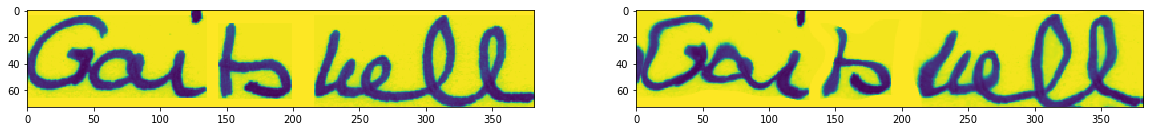

In [62]:
img = cv2.imread('imgs/6.png', 0)
est =  elastic_transformations(200,10)
res = est(np.array([img]))

fig ,  ax = plt.subplots(1,2,figsize = (20,20))
ax[0].imshow(img)
ax[1].imshow(res[0])


## Training Neural Network  

<img src =  "nn.png">

### Neural Network Architecture as defined in literature :  

Our <b>CNN-LSTM</b> network, uses <b>6 convolu-tional layers: 64, 128, 256, 256, 512, and 512</b> (3x3) filters
respectively in the forward direction. <br>Batch normalization
is applied after the 4th and 5th layers. <b>Max pooling (2x2
window), stride 2 </b>in both directions are applied after the 1st
and 2nd layers. Max pooling (2x2 window) and vertical stride
of 2 and horizontal stride of 1 is applied after the 4th and 6th
layer. <b>Two BLSTM </b>layers follow with <b>512 and 256 hidden
nodes</b> respectively with dropout rate of 0.5 before each. A
<b>fully connected layer</b> reduces the output to the character set
size and a <b>softmax</b> is applied. It is trained using the <b>CTC loss
and the ADADELTA optimizer</b>.

We can also view the NN in a more formal way as a function  which maps an image (or matrix) M of size W×H to a character sequence (c1, c2, …) with a length between 0 and L. As you can see, the text is recognized on character-level, therefore words or texts not contained in the training data can be recognized too (as long as the individual characters get correctly classified).
<img src = "eq.png">


### CNN - RNN hybrid network 

Word recognition is the problem of converting the handwritten content present in an image into machine understandable text. we use a CNN-RNN hybrid architecture, which consists of a spatial transformer
layer , followed by a set of residual convolutional blocks, proceeded by a stacked BLSTM (bidirectional LSTM) and ends with a linear layer for transcribing the labels.<br><br> The
STN network is an end-to-end trainable layer which performs
geometric transformation on the input, so as to correct the
distortions that are present in handwriting due to variable hand
movements. It can be used to correct various geometric
transformations such as affine, thin plate spline, etc.<br><br> The convolutional layers (ReseNet18 [6]) here are used for learning a sequence of feature maps, which are then passed on as input to the stacked BLSTMs. The last convolutional layer which obtain a feature map is given as an input to
the recurrent layers (here BLSTMs) as a sequence of feature
vectors.<br>

<b>CNN : </b> the input image is fed into the CNN layers. These layers are trained to extract relevant features from the image. <br><br>
<b> RNN : </b>   RNN propagates relevant information through this sequence. The popular Long Short-Term Memory (LSTM) implementation of RNNs is used, as it is able to propagate information through longer distances and provides more robust training-characteristics than vanilla RNN. <br><br>
<b> CTC </b> while training the NN, the CTC is given the RNN output matrix and the ground truth text and it computes the loss value. While inferring, the CTC is only given the matrix and it decodes it into the final text. Both the ground truth text and the recognized text can be at most 32 characters long.

## RESULTS :  

#### Default  (without ) augmentation report : (file  -> default.txt)

'''
Epoch:==============================================================1
Train NN
validation starts ===========
Character error rate: 93.6757448364 . Word accuracy: 0.0 .
character error rate : 0.936757448364
Character error rate improved, save model
Epoch:==============================================================2
Train NN
validation starts ===========
Character error rate: 83.0378358618 . Word accuracy: 10.5357142857 .
character error rate : 0.830378358618
Character error rate improved, save model
Epoch:==============================================================3
Train NN
validation starts ===========
Character error rate: 69.5987936392 . Word accuracy: 20.5714285714 .
character error rate : 0.695987936392
Character error rate improved, save model
Epoch:==============================================================4
Train NN
validation starts ===========
Character error rate: 61.1314202157 . Word accuracy: 22.3571428571 .
character error rate : 0.611314202157
Character error rate improved, save model
Epoch:==============================================================5
Train NN
validation starts ===========
Character error rate: 45.3390605008 . Word accuracy: 31.1964285714 .
character error rate : 0.453390605008
Character error rate improved, save model
Epoch:==============================================================6
Train NN
validation starts ===========
Character error rate: 35.9120818863 . Word accuracy: 38.1071428571 .
character error rate : 0.359120818863
Character error rate improved, save model
Epoch:==============================================================7
Train NN
validation starts ===========
Character error rate: 37.4885761287 . Word accuracy: 35.0892857143 .
character error rate : 0.374885761287
Character error rate not improved
Epoch:==============================================================8
Train NN
validation starts ===========
Character error rate: 26.763845732 . Word accuracy: 47.9107142857 .
character error rate : 0.26763845732
Character error rate improved, save model
Epoch:==============================================================9
Train NN
validation starts ===========
Character error rate: 25.1599341985 . Word accuracy: 50.0 .
character error rate : 0.251599341985
Character error rate improved, save model
Epoch:==============================================================10
Train NN
validation starts ===========
Character error rate: 28.2855053921 . Word accuracy: 47.5714285714 .
character error rate : 0.282855053921
Character error rate not improved
Epoch:==============================================================11
Train NN
validation starts ===========
Character error rate: 23.5605922135 . Word accuracy: 52.5892857143 .
character error rate : 0.235605922135
Character error rate improved, save model
Epoch:==============================================================12
Train NN
validation starts ===========
Character error rate: 22.8248949004 . Word accuracy: 54.1071428571 .
character error rate : 0.228248949004
Character error rate improved, save model
Epoch:==============================================================13
Train NN
validation starts ===========
Character error rate: 21.7967464814 . Word accuracy: 54.5892857143 .
character error rate : 0.217967464814
Character error rate improved, save model
Epoch:==============================================================14
Train NN
validation starts ===========
Character error rate: 24.4836410163 . Word accuracy: 50.125 .
character error rate : 0.244836410163
Character error rate not improved
Epoch:==============================================================15
Train NN
validation starts ===========
Character error rate: 21.481447633 . Word accuracy: 56.3928571429 .
character error rate : 0.21481447633
Character error rate improved, save model
Epoch:==============================================================16
Train NN
validation starts ===========
Character error rate: 20.0511789435 . Word accuracy: 56.4642857143 .
character error rate : 0.200511789435
Character error rate improved, save model
Epoch:==============================================================17
Train NN
validation starts ===========
Character error rate: 21.3078047889 . Word accuracy: 55.6964285714 .
character error rate : 0.213078047889
Character error rate not improved
Epoch:==============================================================18
Train NN
validation starts ===========
Character error rate: 19.3566075672 . Word accuracy: 58.9642857143 .
character error rate : 0.193566075672
Character error rate improved, save model
Epoch:==============================================================19
Train NN
validation starts ===========
Character error rate: 18.4518369585 . Word accuracy: 59.5178571429 .
character error rate : 0.184518369585
Character error rate improved, save model
Epoch:==============================================================20
Train NN
validation starts ===========
Character error rate: 18.5066715409 . Word accuracy: 59.7678571429 .
character error rate : 0.185066715409
Character error rate not improved
'''